In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import sklearn
import datetime

<h1>Load smart meter train set to get label for training</h1>

In [2]:
file_path = os.path.dirname(os.path.abspath(""))

In [3]:
interim_dataset_folder = os.path.abspath(os.path.join(file_path, "./data/interim"))
smart_meter_train_pickle_path = interim_dataset_folder + "./train_pickle.pkl"
# Read pickle version of pre-processed smart meter dataset
smart_meter_train = pd.read_pickle(smart_meter_train_pickle_path)

In [4]:
smart_meter_label = smart_meter_train["Consumption"]

<h1>Load preprocessed smart meter train set (array) for training</h1>

In [30]:
preprocessed_dataset_folder = os.path.abspath(os.path.join(file_path, "./data/preprocessed"))
preprossed_smart_meter_train_path = preprocessed_dataset_folder + "./preprocessed_smdb_train_npy.npy"
preprossed_smart_meter_train = np.load(preprossed_smart_meter_train_path)

<h1>Dimension reduction</h1>

In [31]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA()
reduced_train_set= pca.fit_transform(preprossed_smart_meter_train)

# Look for optimal number of components
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1

In [51]:
# Run PCA again with optimal number of component, d
pca_d = PCA(n_components=d)
reduced_train_set_d = pca_d.fit_transform(preprossed_smart_meter_train)
cumsum_d = np.cumsum(pca_d.explained_variance_ratio_)

In [52]:
cumsum_d

array([0.2916921 , 0.4717075 , 0.57857102, 0.64884738, 0.70294913,
       0.74665099, 0.78880877, 0.82968817, 0.85921732, 0.88639796,
       0.91167676, 0.93442626, 0.95648903])

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Explained variance vs Number of components')

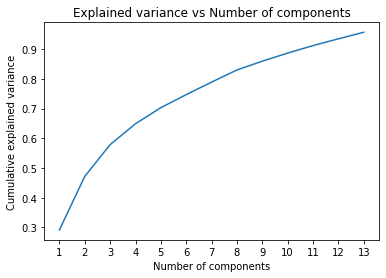

In [54]:
# Visualising the eigenvalues and finding the elbow of the graphic
sns.lineplot(x = list(range(1,len(cumsum_d)+1)), y = cumsum_d)
plt.xlabel("Number of components")
plt.xticks(list(range(1,len(cumsum_d)+1)))
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

<h1>Model selection</h1>

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [56]:
forest_reg = RandomForestRegressor()

In [57]:
forest_reg.fit(reduced_train_set_d,smart_meter_label)

RandomForestRegressor()

In [58]:
smart_meter_predictions = forest_reg.predict(reduced_train_set_d)

In [59]:
forest_mse = mean_squared_error(smart_meter_label, smart_meter_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.21028778562234787

In [60]:
# get importance
importance = forest_reg.feature_importances_

In [61]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07942
Feature: 1, Score: 0.09075
Feature: 2, Score: 0.07679
Feature: 3, Score: 0.08456
Feature: 4, Score: 0.08325
Feature: 5, Score: 0.06799
Feature: 6, Score: 0.07403
Feature: 7, Score: 0.06775
Feature: 8, Score: 0.07648
Feature: 9, Score: 0.06746
Feature: 10, Score: 0.07703
Feature: 11, Score: 0.07681
Feature: 12, Score: 0.07767
